# Conteúdo da aula necessário para os desafios.

In [0]:
import pandas as pd

%precision %.2f
pd.options.display.float_format = '{:,.2f}'.format

uri = "https://github.com/guilhermesilveira/enem-2018/blob/master/MICRODADOS_ENEM_2018_SAMPLE_43278.csv?raw=true"
dados = pd.read_csv(uri)
#dados.head()



In [2]:
dados.describe()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,NU_IDADE,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,CO_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,IN_OUTRA_DEF,IN_GESTANTE,IN_LACTANTE,IN_IDOSO,IN_ESTUDA_CLASSE_HOSPITALAR,IN_SEM_RECURSO,IN_BRAILLE,...,IN_CADEIRA_ACOLCHOADA,IN_PROVA_DEITADO,IN_MOBILIARIO_OBESO,IN_LAMINA_OVERLAY,IN_PROTETOR_AURICULAR,IN_MEDIDOR_GLICOSE,IN_MAQUINA_BRAILE,IN_SOROBAN,IN_MARCA_PASSO,IN_SONDA,IN_MEDICAMENTOS,IN_SALA_INDIVIDUAL,IN_SALA_ESPECIAL,IN_SALA_ACOMPANHANTE,IN_MOBILIARIO_ESPECIFICO,IN_MATERIAL_ESPECIFICO,IN_NOME_SOCIAL,CO_MUNICIPIO_PROVA,CO_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q005
count,"137,844.00","137,844.00","137,844.00","137,844.00","137,843.00","132,485.00","137,844.00","137,844.00","133,140.00","133,140.00","137,844.00","137,844.00","137,844.00","86,900.00","137,844.00","36,232.00","36,232.00","36,232.00","36,232.00","36,232.00","36,232.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00",...,"137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,838.00","137,838.00","137,838.00","137,838.00","97,537.00","103,774.00","103,774.00","97,537.00","97,537.00","103,774.00","103,774.00","97,537.00","137,844.00","103,774.00","103,774.00","103,774.00","103,774.00","103,774.00","103,774.00","103,774.00","137,844.00"
mean,"180,010,423,553.31","2,018.00","3,118,377.40",31.03,22.38,0.12,2.12,1.04,"3,085,664.65",30.70,1.54,3.00,1.34,1.20,0.10,"31,587,077.66","3,160,970.21",31.45,2.31,1.03,1.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,"3,119,912.84",31.05,0.71,0.75,0.75,0.71,448.51,452.52,456.51,460.50,493.63,568.31,526.59,535.18,0.53,1.10,121.73,101.70,97.18,117.03,71.50,509.13,3.90
std,"1,918,950.00",0.00,"994,483.04",9.92,7.61,0.38,1.02,0.23,"975,680.73",9.72,0.72,4.00,0.70,0.60,0.29,"9,765,074.33","979,871.51",9.77,0.78,0.18,0.12,0.03,0.01,0.02,0.02,0.00,0.04,0.02,0.03,0.01,0.01,0.01,0.02,0.03,0.02,0.03,0.00,0.00,0.04,0.01,...,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.01,0.01,0.00,0.00,0.00,0.00,0.01,"994,800.12",9.92,0.46,0.43,0.43,0.46,1.21,1.33,1.31,1.14,74.18,81.03,73.02,102.83,0.50,0.69,31.32,49.51,47.00,35.20,52.21,187.01,1.51
min,"180,007,186,686.00","2,018.00","1,100,015.00",11.00,13.00,0.00,0.00,0.00,"1,100,015.00",11.00,1.00,0.00,1.00,1.00,0.00,"11,000,058.00","1,100,015.00",11.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,"1,100,015.00",11.00,0.00,0.00,0.00,0.00,447.00,451.00,455.00,459.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
25%,"180,008,761,760.75","2,018.00","2,409,100.00",24.00,18.00,0.00,1.00,1.00,"2,408,102.00",24.00,1.00,0.00,1.00,1.00,0.00,"24,328,308.00","2,414,407.00",24.00,2.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.

Seleção das colunas com notas

In [3]:
colunas_de_notas = ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']
dados_notas = dados[colunas_de_notas].dropna()
dados_notas.columns = ['ciencias_naturais', 'ciencias_humanas', 'linguagem_codigo', 'matematica', 'redacao']
dados_notas.head()

,ciencias_naturais,ciencias_humanas,linguagem_codigo,matematica,redacao
1,523.10,671.30,661.60,738.00,680.00
2,409.20,531.70,389.00,438.10,600.00
3,452.30,505.50,448.50,544.90,400.00
6,428.50,505.20,521.00,436.80,560.00
8,491.80,575.70,524.40,487.60,660.00


Correlação das notas

In [4]:
corr = dados_notas.corr()
corr

,ciencias_naturais,ciencias_humanas,linguagem_codigo,matematica,redacao
ciencias_naturais,1.00,0.57,0.60,0.58,0.51
ciencias_humanas,0.57,1.00,0.70,0.53,0.50
linguagem_codigo,0.60,0.70,1.00,0.57,0.56
matematica,0.58,0.53,0.57,1.00,0.48
redacao,0.51,0.50,0.56,0.48,1.00


Heatmaps

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


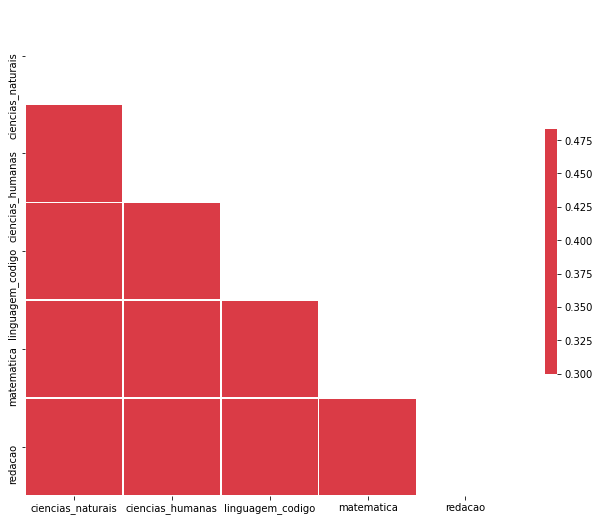

In [5]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

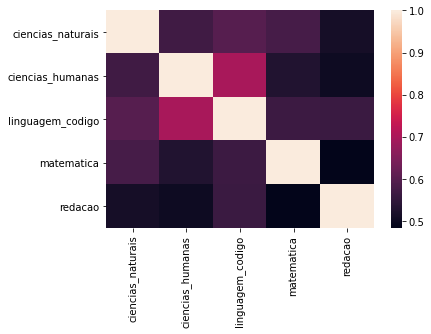

In [6]:
sns.heatmap(corr)

# Desafios

## Desafio 1 da [Thais André](https://twitter.com/thais_tandre)

Se a pessoa não teve presença, preencha a nota dela com algum número. A nota 0? A nota média? A mediana?

In [7]:
dados["TP_PRESENCA_CN"].value_counts()

1.00    97537
0.00    40274
2.00       27
Name: TP_PRESENCA_CN, dtype: int64

In [8]:
dados.query("TP_PRESENCA_MT == 0.00")["NU_NOTA_MT"]

0        nan
4        nan
5        nan
7        nan
14       nan
          ..
137833   nan
137837   nan
137839   nan
137841   nan
137843   nan
Name: NU_NOTA_MT, Length: 40274, dtype: float64

In [9]:
dados.query("TP_PRESENCA_MT == 1.00")["NU_NOTA_MT"]

1        738.00
2        438.10
3        544.90
6        436.80
8        487.60
          ...  
137835   513.40
137836   462.80
137838   486.80
137840   576.40
137842   591.40
Name: NU_NOTA_MT, Length: 97537, dtype: float64

In [10]:
dados.query("TP_PRESENCA_MT == 2.00")["NU_NOTA_MT"]

1144     nan
1947     nan
4891     nan
5054     nan
12112    nan
30483    nan
33867    nan
38510    nan
45811    nan
47419    nan
50226    nan
59430    nan
64788    nan
65766    nan
73054    nan
77120    nan
83170    nan
88532    nan
98580    nan
105409   nan
112843   nan
114518   nan
126692   nan
127392   nan
129803   nan
132098   nan
133333   nan
Name: NU_NOTA_MT, dtype: float64

Selecionando campos de interesse

In [11]:
lst_campos = ['TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC','TP_PRESENCA_MT', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT',
               'TX_GABARITO_CN', 'TX_GABARITO_CH', 'TX_GABARITO_LC','TX_GABARITO_MT', 'TX_RESPOSTAS_CH',
       'TX_RESPOSTAS_LC', 'TX_RESPOSTAS_MT',  'TX_RESPOSTAS_CN']

dtf_des1_matriz = dados[lst_campos]

dtf_des1_matriz.head()

,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TX_RESPOSTAS_CN
0,0.00,0.00,0.00,0.00,nan,nan,nan,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.00,1.00,1.00,1.00,523.10,671.30,661.60,738.00,BCACEEBBBDACEDECAADDDABDBCCACDCBCEDEDABEBEAEA,CDECAABBDDECBEEDBEBBEBEDEEEBCEAEECECCDBDDCACD,CBEDBBBDCBECADBBBECBEAECABDADACDBABCECBBEDADAB...,ADAEDABBCAADBEXEBBDEEADCCCCDACEDDABCBCAAEBBDD,ADECAADBACECBEEDBEDBABEBCBACCEBCAAECCDEDABACD,CBEDB99999ECADEABEADEAACABDADACDCCBCEEBBADCDAB...,ADDEDEEBCAADDEDEBECCBAECECEDBAADEABAECDADECDC,CCAADAEEDCDAEEABADDECACBEEDDBDCCCEDACCADAACAC
2,1.00,1.00,1.00,1.00,409.20,531.70,389.00,438.10,BDDEDBCACEBCCACDCDDAECAADBDBCEEAEAABEBEBBACED,CACDDBDDECCEDEEEBCEAEECBBEBEDBEDECBEBDCAABCDE,BBDECBBCDBCECBABDBEDACDDBBBEADECACEDBEBABCBEAE...,ACEADCEBBDADAAEBBDDEDABADBEXCCCDBCAEEACBCDDAB,AAACCCBAEBBEBEEAAEDCAAEABDEBBCDCCBADEABADBCAD,99999ABEDADDAACEBDACAEACBAAABDBABCABABABEBBEBB...,ABCBEECAABDDADCACAAAABDDEDACAEEECCDCEBBABBECB,AEEEBDBBCADADBBCCCDCCBEEDABACAACCADDBBDACBAAC
3,1.00,1.00,1.00,1.00,452.30,505.50,448.50,544.90,ACEDEAEAEBECAADABBDBCEDEDDCDDABCCACBCACEBDEBB,ECCBBEBEDBEDBDDAEECDECBECACDEDEECDECAABBDEBCE,BCDEBDBCBBACDCBEAECBABADBBECECBDBBEABDADACEDEC...,EBBDEECCCDACEADCBCAAEBBCBCADAEDABADDADDABDBEX,DABECDAECBADCAECDDAECAEDBDDDCABDECCCAABEDADCD,AEDBB99999DDADECBBEEADABBBECAEBCCACECABBADABCD...,DEBEBEABDABECACDDDECBBDDBCBBCABDAACCECBABDCDA,BBDEDDDCDACDADBBBCEAACAAAACECBCADEDBECCAADACB
4,0.00,0.00,0.00,0.00,nan,nan,nan,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Análise da alteração da nota "MT" quando presença tem valor 0, 1 e 2

In [12]:
dtf_des1_matriz.query("TP_PRESENCA_MT == 0.00")[["TP_PRESENCA_MT", "NU_NOTA_MT", "TX_RESPOSTAS_MT" ,"TX_GABARITO_MT"]].head()

,TP_PRESENCA_MT,NU_NOTA_MT,TX_RESPOSTAS_MT,TX_GABARITO_MT
0,0.00,nan,NaN,NaN
4,0.00,nan,NaN,NaN
5,0.00,nan,NaN,NaN
7,0.00,nan,NaN,NaN
14,0.00,nan,NaN,NaN


In [13]:
dtf_des1_matriz.query("TP_PRESENCA_MT == 1.00")[["TP_PRESENCA_MT", "NU_NOTA_MT", "TX_RESPOSTAS_MT" ,"TX_GABARITO_MT"]].head()

,TP_PRESENCA_MT,NU_NOTA_MT,TX_RESPOSTAS_MT,TX_GABARITO_MT
1,1.00,738.00,ADDEDEEBCAADDEDEBECCBAECECEDBAADEABAECDADECDC,ADAEDABBCAADBEXEBBDEEADCCCCDACEDDABCBCAAEBBDD
2,1.00,438.10,ABCBEECAABDDADCACAAAABDDEDACAEEECCDCEBBABBECB,ACEADCEBBDADAAEBBDDEDABADBEXCCCDBCAEEACBCDDAB
3,1.00,544.90,DEBEBEABDABECACDDDECBBDDBCBBCABDAACCECBABDCDA,EBBDEECCCDACEADCBCAAEBBCBCADAEDABADDADDABDBEX
6,1.00,436.80,CCECCBDECCEBABADBDAACEBDBBCEEACDCABAECBCABDEC,EBBDEECCCDACEADCBCAAEBBCBCADAEDABADDADDABDBEX
8,1.00,487.60,BDCADDBCDBDBEBCEDADCEBBACECBAAEBDDBDCABECDADA,ADCACEDDABEBBCBCADDACCCDEBBDAEEDBEXBCAEDABADA


In [14]:
dtf_des1_matriz.query("TP_PRESENCA_MT == 2.00")[["TP_PRESENCA_MT", "NU_NOTA_MT", "TX_RESPOSTAS_MT" ,"TX_GABARITO_MT"]].head()

,TP_PRESENCA_MT,NU_NOTA_MT,TX_RESPOSTAS_MT,TX_GABARITO_MT
1144,2.00,nan,NaN,NaN
1947,2.00,nan,NaN,NaN
4891,2.00,nan,NaN,NaN
5054,2.00,nan,NaN,NaN
12112,2.00,nan,NaN,NaN


In [15]:
dtf_des1_matriz.query("TP_PRESENCA_MT in (2.00, 0.00)")["NU_NOTA_MT"].value_counts()

Series([], Name: NU_NOTA_MT, dtype: int64)

Como não consegui baixar a base orginal e acessar o dicionário de dados, estou inferindo com bases nas consultas acima referente aos campos que indicam a presença:

0.00 - Candidato não compareceu no dia da prova;  
1.00 - Candidato compareceu no dia da prova e respondeu a prova;  
2.00 - Candidato não preencheu o gabarito dessa prova.

In [0]:
#Obtendo dados estatísticos dos campos de nota para preenchimento
flt_media_mt = dtf_des1_matriz["NU_NOTA_MT"].describe()["mean"]
flt_media_lc = dtf_des1_matriz["NU_NOTA_LC"].describe()["mean"]
flt_media_cn = dtf_des1_matriz["NU_NOTA_CN"].describe()["mean"]
flt_media_ch = dtf_des1_matriz["NU_NOTA_CH"].describe()["mean"]

flt_mediana_mt = dtf_des1_matriz["NU_NOTA_MT"].describe()["50%"]
flt_mediana_lc = dtf_des1_matriz["NU_NOTA_LC"].describe()["50%"]
flt_mediana_cn = dtf_des1_matriz["NU_NOTA_CN"].describe()["50%"]
flt_mediana_ch = dtf_des1_matriz["NU_NOTA_CH"].describe()["50%"]


In [0]:
#Copiando dataset
dtf_des1_zero = dtf_des1_matriz.copy()
dtf_des1_media = dtf_des1_matriz.copy()
dtf_des1_mediana = dtf_des1_matriz.copy()

Substituições dos valores nulos

In [0]:
dtf_des1_zero.update(dtf_des1_zero["NU_NOTA_MT"].fillna(0) )
dtf_des1_zero.update(dtf_des1_zero["NU_NOTA_LC"].fillna(0) )
dtf_des1_zero.update(dtf_des1_zero["NU_NOTA_CN"].fillna(0) )
dtf_des1_zero.update(dtf_des1_zero["NU_NOTA_CH"].fillna(0) )

In [0]:
dtf_des1_media.update(dtf_des1_media["NU_NOTA_MT"].fillna(flt_media_mt) )
dtf_des1_media.update(dtf_des1_media["NU_NOTA_LC"].fillna(flt_media_lc) )
dtf_des1_media.update(dtf_des1_media["NU_NOTA_CN"].fillna(flt_media_cn) )
dtf_des1_media.update(dtf_des1_media["NU_NOTA_CH"].fillna(flt_media_ch) )

In [0]:
dtf_des1_mediana.update(dtf_des1_mediana["NU_NOTA_MT"].fillna(flt_mediana_mt) )
dtf_des1_mediana.update(dtf_des1_mediana["NU_NOTA_LC"].fillna(flt_mediana_lc) )
dtf_des1_mediana.update(dtf_des1_mediana["NU_NOTA_CN"].fillna(flt_mediana_cn) )
dtf_des1_mediana.update(dtf_des1_mediana["NU_NOTA_CH"].fillna(flt_mediana_ch) )

 #### Describe das notas

In [21]:
print("Dados originais")
print(dtf_des1_matriz[['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT']].describe())

Dados originais
       NU_NOTA_CN  NU_NOTA_CH  NU_NOTA_LC  NU_NOTA_MT
count   97,537.00  103,774.00  103,774.00   97,537.00
mean       493.63      568.31      526.59      535.18
std         74.18       81.03       73.02      102.83
min          0.00        0.00        0.00        0.00
25%        435.50      510.40      475.70      455.60
50%        483.50      582.40      531.20      516.50
75%        542.60      628.00      579.80      600.00
max        869.60      850.40      781.40      989.90


In [22]:
print("Substituição por zero")
print(dtf_des1_zero[['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT']].describe())

Substituição por zero
       NU_NOTA_CN  NU_NOTA_CH  NU_NOTA_LC  NU_NOTA_MT
count  137,844.00  137,844.00  137,844.00  137,844.00
mean       349.29      427.84      396.44      378.69
std        233.05      255.03      235.82      258.35
min          0.00        0.00        0.00        0.00
25%          0.00      398.30      342.17        0.00
50%        443.70      538.30      496.40      466.10
75%        515.60      614.20      563.70      559.20
max        869.60      850.40      781.40      989.90


In [23]:
print("Substituição por média")
print(dtf_des1_media[['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT']].describe())

Substituição por média
       NU_NOTA_CN  NU_NOTA_CH  NU_NOTA_LC  NU_NOTA_MT
count  137,844.00  137,844.00  137,844.00  137,844.00
mean       493.63      568.31      526.59      535.18
std         62.40       70.30       63.36       86.50
min          0.00        0.00        0.00        0.00
25%        454.50      537.10      495.60      480.60
50%        493.63      568.31      526.59      535.18
75%        515.60      614.20      563.70      559.20
max        869.60      850.40      781.40      989.90


In [24]:
print("Substituição por mediana")
print(dtf_des1_mediana[['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT']].describe())

Substituição por mediana
       NU_NOTA_CN  NU_NOTA_CH  NU_NOTA_LC  NU_NOTA_MT
count  137,844.00  137,844.00  137,844.00  137,844.00
mean       490.67      571.79      527.73      529.72
std         62.57       70.57       63.39       86.91
min          0.00        0.00        0.00        0.00
25%        454.50      537.10      495.60      480.60
50%        483.50      582.40      531.20      516.50
75%        515.60      614.20      563.70      559.20
max        869.60      850.40      781.40      989.90


**Comparação das alterações**

Variáveis|NU_NOTA_CN|NU_NOTA_CH|NU_NOTA_LC|NU_NOTA_MT|Dataset
---------|----------|----------|----------|----------|--------
count| 97,537.00|103,774.00|103,774.00|97,537.00|original
count| 137,844.00|137,844.00|137,844.00|137,844.00|média/mediana/zero
  |  |  |  |  |  
mean|493.63|568.31|526.59|535.18|original
mean|493.63|568.31|526.59|535.18|média
mean|490.67|571.79|527.73|529.72|mediana
mean|349.29|427.84|396.44|378.69|zero
  |  |  |  |  |  
std|74.18|81.03|73.02|02.83|original
std|62.40|70.30|63.36|86.50|média
std|62.57|70.57|63.39|86.91|mediana
std|233.05|255.03|235.82|258.35|zero
  |  |  |  |  |  
25%|435.50|510.40|475.70|455.60|original
25%|454.50|537.10|495.60|480.60|média
25%|454.50|537.10|495.60|480.60|mediana
25%|0.00|398.30|342.17|0.00|zero
 |  |  |  |  |  
50%|483.50|582.40|531.20|516.50|original
50%|493.63|568.31|526.59|535.18|média
50%|483.50|582.40|531.20|516.50|mediana
50%|443.70|538.30|496.40|466.10|zero
 |  |  |  |  |   
75%|542.60|628.00|579.80|600.00|original
75%|515.60|614.20|563.70|559.20|média
75%|515.60|614.20|563.70|559.20|mediana
75%|515.60|614.20|563.70|559.20|zero





















#### Correlações

In [25]:
print("Dados originais")
print(dtf_des1_matriz[['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT']].corr())

Dados originais
            NU_NOTA_CN  NU_NOTA_CH  NU_NOTA_LC  NU_NOTA_MT
NU_NOTA_CN        1.00        0.57        0.60        0.58
NU_NOTA_CH        0.57        1.00        0.70        0.53
NU_NOTA_LC        0.60        0.70        1.00        0.57
NU_NOTA_MT        0.58        0.53        0.57        1.00


In [26]:
print("Substituição por zero")
print(dtf_des1_zero[['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT']].corr())

Substituição por zero
            NU_NOTA_CN  NU_NOTA_CH  NU_NOTA_LC  NU_NOTA_MT
NU_NOTA_CN        1.00        0.87        0.87        0.96
NU_NOTA_CH        0.87        1.00        0.98        0.86
NU_NOTA_LC        0.87        0.98        1.00        0.86
NU_NOTA_MT        0.96        0.86        0.86        1.00


In [27]:
print("Substituição por média")
print(dtf_des1_media[['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT']].corr())

Substituição por média
            NU_NOTA_CN  NU_NOTA_CH  NU_NOTA_LC  NU_NOTA_MT
NU_NOTA_CN        1.00        0.54        0.57        0.58
NU_NOTA_CH        0.54        1.00        0.70        0.50
NU_NOTA_LC        0.57        0.70        1.00        0.54
NU_NOTA_MT        0.58        0.50        0.54        1.00


In [28]:
print("Substituição por mediana")
print(dtf_des1_mediana[['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT']].corr())

Substituição por mediana
            NU_NOTA_CN  NU_NOTA_CH  NU_NOTA_LC  NU_NOTA_MT
NU_NOTA_CN        1.00        0.53        0.57        0.58
NU_NOTA_CH        0.53        1.00        0.70        0.49
NU_NOTA_LC        0.57        0.70        1.00        0.54
NU_NOTA_MT        0.58        0.49        0.54        1.00


#### Pairplots

Dados originais


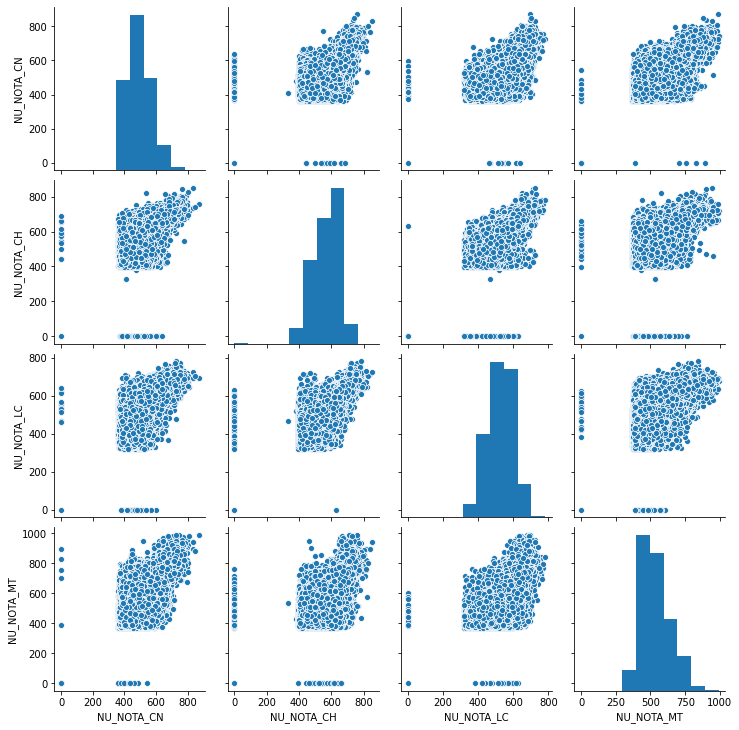

In [29]:
print("Dados originais")
sns.pairplot(dtf_des1_matriz[['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT']])

Substituição por zero


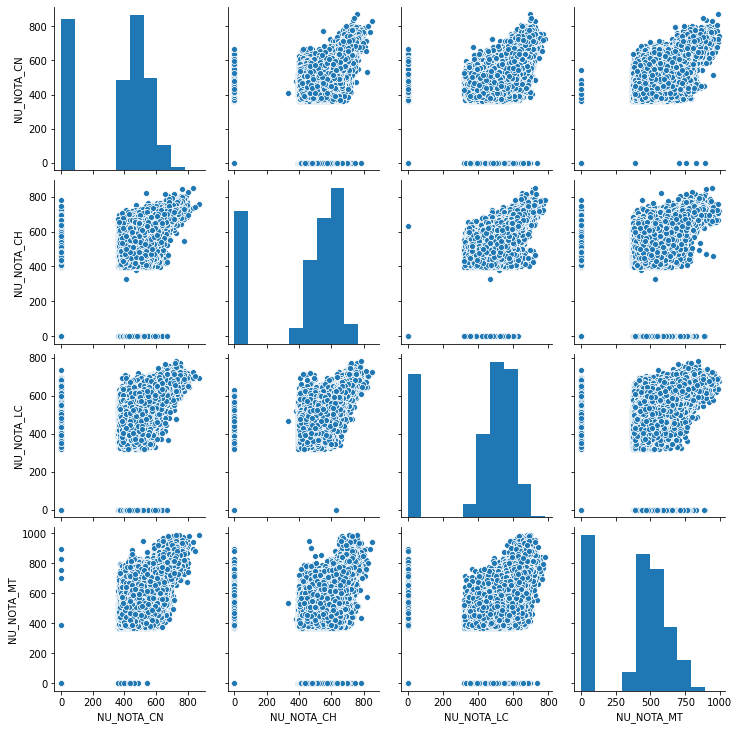

In [30]:
print("Substituição por zero")
sns.pairplot(dtf_des1_zero[['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT']])

Substituição por Média


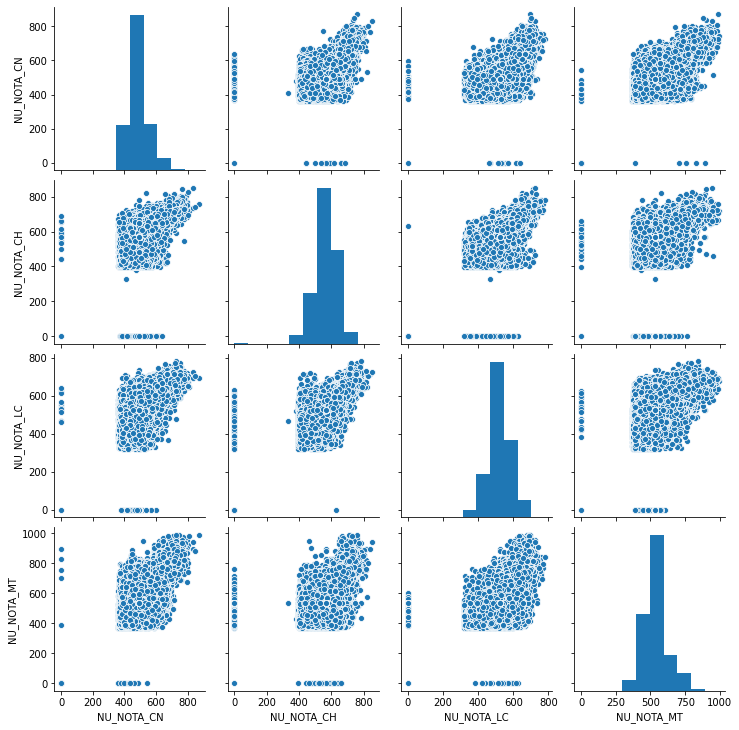

In [31]:
print("Substituição por Média")
sns.pairplot(dtf_des1_media[['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT']])

Substituição por Mesdiana


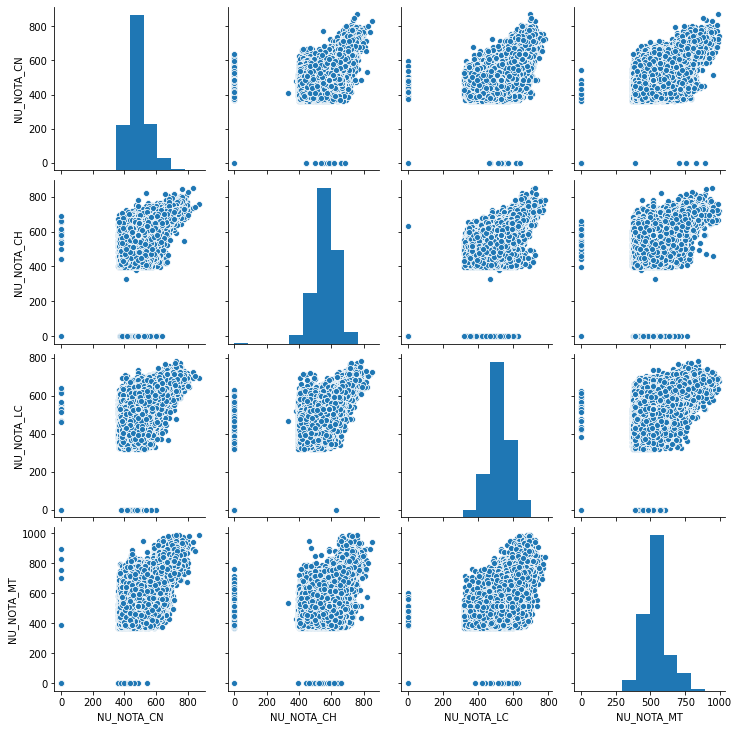

In [32]:
print("Substituição por Mesdiana")
sns.pairplot(dtf_des1_mediana[['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT']])

**Conclusões**

A substituição dos valores nulos por zero nas notas foi em comparação a que mais trouxe mudanças o conjunto de dados originais.

A subsituição por média ou mediana, altera a distruibuição dos dados, mas não com tantas diferenças em relação a substituir por zero.

## Desafio 2 do [Thiago Gonçalves](https://twitter.com/tgcsantos)

A matriz de correlação está feiosa, vamos deixar mais bonita? :) Não se esqueça de manter os valores dentro delas.

In [33]:
dtf_des2 = corr.copy()

dtf_des2

,ciencias_naturais,ciencias_humanas,linguagem_codigo,matematica,redacao
ciencias_naturais,1.00,0.57,0.60,0.58,0.51
ciencias_humanas,0.57,1.00,0.70,0.53,0.50
linguagem_codigo,0.60,0.70,1.00,0.57,0.56
matematica,0.58,0.53,0.57,1.00,0.48
redacao,0.51,0.50,0.56,0.48,1.00


In [34]:
def gera_txt_porcentagem(flt_valor):

  str_m = "{valor:.2f}%"
  str_r = str_m.format(valor = (flt_valor * 100))

  return str_r
#Fim da função

gera_txt_porcentagem(0.57)

'57.00%'

In [35]:
dtf_des2 = dtf_des2.applymap(gera_txt_porcentagem)

dtf_des2

,ciencias_naturais,ciencias_humanas,linguagem_codigo,matematica,redacao
ciencias_naturais,100.00%,57.20%,60.03%,57.91%,51.32%
ciencias_humanas,57.20%,100.00%,69.83%,52.93%,50.29%
linguagem_codigo,60.03%,69.83%,100.00%,56.55%,56.30%
matematica,57.91%,52.93%,56.55%,100.00%,48.33%
redacao,51.32%,50.29%,56.30%,48.33%,100.00%


## Desafio 3 do [Paulo Silveira](https://twitter.com/paulo_caelum)


Pairplot dos acertos de cada categoria (CN, CH, MT, LC, nota pura da redação). Usar o gabarito e as respostas

In [0]:
def obtem_numeros_acertos(str_resp, str_gab):

  #Se o candidato não fez a prova
  if str(type(str_resp)).count("float") != 0:
    return 0

  if str_gab == np.NaN or str_gab == "" or str_resp == "" or str_resp == np.NAN:
    return 0

  int_min = len(str_resp)

  int_acertos = 0

  for i in range(0, int_min, 1):

    if str_resp[i] == str_gab[i]:

      int_acertos += 1

  return int_acertos
#Fim da função


Solução baseaada na fonte: https://stackoverflow.com/questions/40045632/adding-a-column-in-pandas-df-using-a-function

In [37]:
#Cópia da matriz
dtf_des3 = dados[ ['TX_RESPOSTAS_CN', 'TX_RESPOSTAS_CH', 'TX_RESPOSTAS_LC', 'TX_RESPOSTAS_MT' , 'TX_GABARITO_CN',
 'TX_GABARITO_CH', 'TX_GABARITO_LC', 'TX_GABARITO_MT', 'NU_NOTA_REDACAO'] ].copy()


dtf_des3["acerto_cn"] = dtf_des3.apply(lambda x: obtem_numeros_acertos(x['TX_RESPOSTAS_CN'], x['TX_GABARITO_CN']), axis=1)
dtf_des3["acerto_ch"] = dtf_des3.apply(lambda x: obtem_numeros_acertos(x['TX_RESPOSTAS_CH'], x['TX_GABARITO_CH']), axis=1)
dtf_des3["acerto_lc"] = dtf_des3.apply(lambda x: obtem_numeros_acertos(x['TX_RESPOSTAS_LC'], x['TX_GABARITO_LC']), axis=1)
dtf_des3["acerto_mt"] = dtf_des3.apply(lambda x: obtem_numeros_acertos(x['TX_RESPOSTAS_MT'], x['TX_GABARITO_MT']), axis=1)

dtf_des3.head(5)

,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,NU_NOTA_REDACAO,acerto_cn,acerto_ch,acerto_lc,acerto_mt
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,0,0,0,0
1,CCAADAEEDCDAEEABADDECACBEEDDBDCCCEDACCADAACAC,ADECAADBACECBEEDBEDBABEBCBACCEBCAAECCDEDABACD,CBEDB99999ECADEABEADEAACABDADACDCCBCEEBBADCDAB...,ADDEDEEBCAADDEDEBECCBAECECEDBAADEABAECDADECDC,BCACEEBBBDACEDECAADDDABDBCCACDCBCEDEDABEBEAEA,CDECAABBDDECBEEDBEBBEBEDEEEBCEAEECECCDBDDCACD,CBEDBBBDCBECADBBBECBEAECABDADACDBABCECBBEDADAB...,ADAEDABBCAADBEXEBBDEEADCCCCDACEDDABCBCAAEBBDD,680.00,11,27,33,22
2,AEEEBDBBCADADBBCCCDCCBEEDABACAACCADDBBDACBAAC,AAACCCBAEBBEBEEAAEDCAAEABDEBBCDCCBADEABADBCAD,99999ABEDADDAACEBDACAEACBAAABDBABCABABABEBBEBB...,ABCBEECAABDDADCACAAAABDDEDACAEEECCDCEBBABBECB,BDDEDBCACEBCCACDCDDAECAADBDBCEEAEAABEBEBBACED,CACDDBDDECCEDEEEBCEAEECBBEBEDBEDECBEBDCAABCDE,BBDECBBCDBCECBABDBEDACDDBBBEADECACEDBEBABCBEAE...,ACEADCEBBDADAAEBBDDEDABADBEXCCCDBCAEEACBCDDAB,600.00,8,9,8,6
3,BBDEDDDCDACDADBBBCEAACAAAACECBCADEDBECCAADACB,DABECDAECBADCAECDDAECAEDBDDDCABDECCCAABEDADCD,AEDBB99999DDADECBBEEADABBBECAEBCCACECABBADABCD...,DEBEBEABDABECACDDDECBBDDBCBBCABDAACCECBABDCDA,ACEDEAEAEBECAADABBDBCEDEDDCDDABCCACBCACEBDEBB,ECCBBEBEDBEDBDDAEECDECBECACDEDEECDECAABBDEBCE,BCDEBDBCBBACDCBEAECBABADBBECECBDBBEABDADACEDEC...,EBBDEECCCDACEADCBCAAEBBCBCADAEDABADDADDABDBEX,400.00,7,10,11,10
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,0,0,0,0


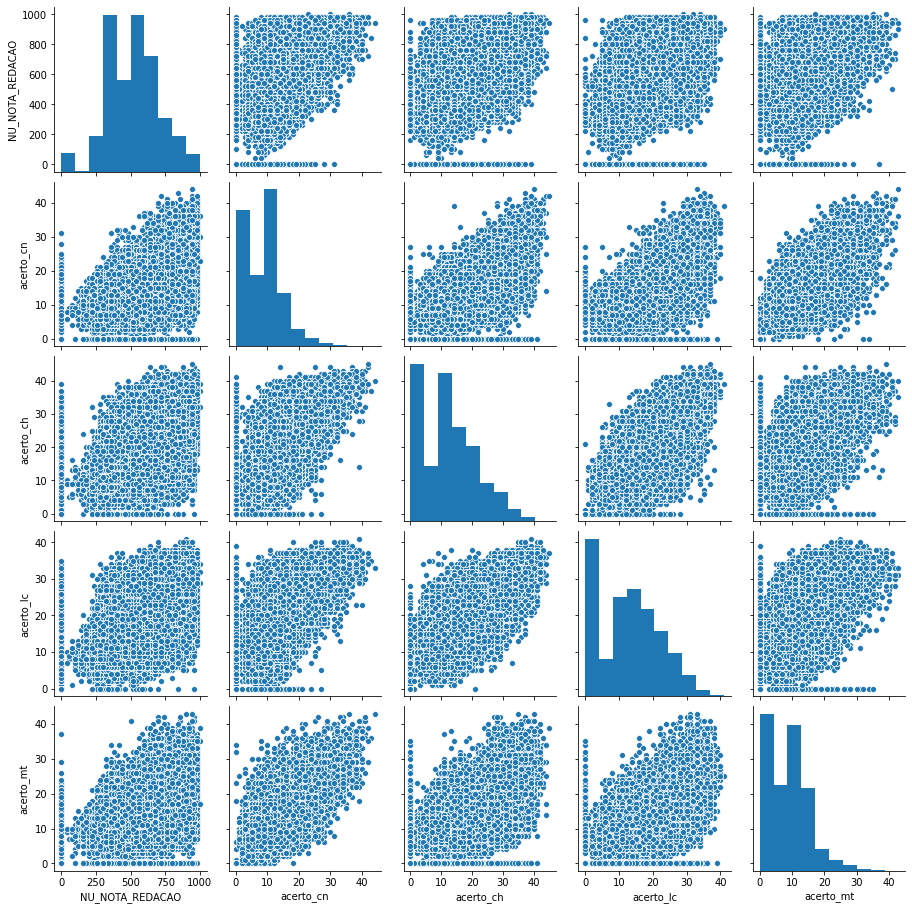

In [38]:
plt.rcParams['figure.facecolor'] = 'white'
sns.pairplot(dtf_des3[['NU_NOTA_REDACAO', 'acerto_cn', 'acerto_ch', 'acerto_lc', 'acerto_mt']])
plt.show()

## Desafio 4 do [Guilherme Silveira](https://twitter.com/guilhermecaelum)

Remover todos os zeros. Tomar o cuidado que no desafio 1 já tomamos decisões ligadas a limpeza dos dados também. Você também pode exportar para outro CSV se quiser.

Será aproveitado o dataframe 'dtf_des1_zero' do desafio para este dessafio.


In [39]:
dtf_des1_zero.head()

,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TX_RESPOSTAS_CN
0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.00,1.00,1.00,1.00,523.10,671.30,661.60,738.00,BCACEEBBBDACEDECAADDDABDBCCACDCBCEDEDABEBEAEA,CDECAABBDDECBEEDBEBBEBEDEEEBCEAEECECCDBDDCACD,CBEDBBBDCBECADBBBECBEAECABDADACDBABCECBBEDADAB...,ADAEDABBCAADBEXEBBDEEADCCCCDACEDDABCBCAAEBBDD,ADECAADBACECBEEDBEDBABEBCBACCEBCAAECCDEDABACD,CBEDB99999ECADEABEADEAACABDADACDCCBCEEBBADCDAB...,ADDEDEEBCAADDEDEBECCBAECECEDBAADEABAECDADECDC,CCAADAEEDCDAEEABADDECACBEEDDBDCCCEDACCADAACAC
2,1.00,1.00,1.00,1.00,409.20,531.70,389.00,438.10,BDDEDBCACEBCCACDCDDAECAADBDBCEEAEAABEBEBBACED,CACDDBDDECCEDEEEBCEAEECBBEBEDBEDECBEBDCAABCDE,BBDECBBCDBCECBABDBEDACDDBBBEADECACEDBEBABCBEAE...,ACEADCEBBDADAAEBBDDEDABADBEXCCCDBCAEEACBCDDAB,AAACCCBAEBBEBEEAAEDCAAEABDEBBCDCCBADEABADBCAD,99999ABEDADDAACEBDACAEACBAAABDBABCABABABEBBEBB...,ABCBEECAABDDADCACAAAABDDEDACAEEECCDCEBBABBECB,AEEEBDBBCADADBBCCCDCCBEEDABACAACCADDBBDACBAAC
3,1.00,1.00,1.00,1.00,452.30,505.50,448.50,544.90,ACEDEAEAEBECAADABBDBCEDEDDCDDABCCACBCACEBDEBB,ECCBBEBEDBEDBDDAEECDECBECACDEDEECDECAABBDEBCE,BCDEBDBCBBACDCBEAECBABADBBECECBDBBEABDADACEDEC...,EBBDEECCCDACEADCBCAAEBBCBCADAEDABADDADDABDBEX,DABECDAECBADCAECDDAECAEDBDDDCABDECCCAABEDADCD,AEDBB99999DDADECBBEEADABBBECAEBCCACECABBADABCD...,DEBEBEABDABECACDDDECBBDDBCBBCABDAACCECBABDCDA,BBDEDDDCDACDADBBBCEAACAAAACECBCADEDBECCAADACB
4,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [40]:
dtf_des4 = dtf_des1_zero.copy()

dtf_des4 = dtf_des4.drop(dtf_des4[(dtf_des4.NU_NOTA_CN == 0) | (dtf_des4.NU_NOTA_CH == 0) | (dtf_des4.NU_NOTA_LC == 0) | (dtf_des4.NU_NOTA_MT == 0)].index)

print("Dataframe com os zeros")
dtf_des1_zero.describe()

Dataframe com os zeros


,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT
count,"137,838.00","137,838.00","137,838.00","137,838.00","137,844.00","137,844.00","137,844.00","137,844.00"
mean,0.71,0.75,0.75,0.71,349.29,427.84,396.44,378.69
std,0.46,0.43,0.43,0.46,233.05,255.03,235.82,258.35
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,1.00,1.00,0.00,0.00,398.30,342.17,0.00
50%,1.00,1.00,1.00,1.00,443.70,538.30,496.40,466.10
75%,1.00,1.00,1.00,1.00,515.60,614.20,563.70,559.20
max,2.00,2.00,2.00,2.00,869.60,850.40,781.40,989.90


In [41]:
print("Dataframe sem os zeros")
dtf_des4.describe()

Dataframe sem os zeros


,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT
count,"97,161.00","97,161.00","97,161.00","97,161.00","97,161.00","97,161.00","97,161.00","97,161.00"
mean,1.00,1.00,1.00,1.00,493.80,571.48,528.87,535.39
std,0.00,0.00,0.00,0.00,73.90,77.06,71.26,102.43
min,1.00,1.00,1.00,1.00,362.50,330.10,318.80,367.00
25%,1.00,1.00,1.00,1.00,435.60,514.20,478.10,455.80
50%,1.00,1.00,1.00,1.00,483.70,585.00,533.40,516.60
75%,1.00,1.00,1.00,1.00,542.70,629.70,581.40,600.10
max,1.00,1.00,1.00,1.00,869.60,850.40,781.40,989.90


## Desafio 5 do [Thiago Gonçalves](https://twitter.com/tgcsantos)

Quais questões tiveram mais erros (análise sobre o gabarito x acertos x erros)

**Observações**: 

1. Serão consideradas como questões erradas aquelas que o candidato respondeu erroneamente (preencheu o gabarito). Questões que ele não tentou responder serão desconsideradas.

2. Está sendo considerando que a ordem da questão nos diferentes tipos de prova é mantida. Caso esse são seja o caso, os passos realizados abaixo não extrai a informação corretamente.

In [0]:
#Questão errada será aquela que o candidato respondeu errado
def obtem_questoes_erros(str_resp, str_gab, letras):

  #Se o candidato não fez a prova
  if str(type(str_resp)).count("float") != 0:
    return ""

  if str_gab == np.NaN or str_gab == "" or str_resp == "" or str_resp == np.NAN:
    return ""

  str_questao = ""

  for i in range(0, len(str_resp), 1):

    if str_resp[i] != str_gab[i]:

      str_questao += "|" + letras + str(i + 1) 

  return str_questao[1:]
#Fim da função

In [0]:
dtf_des5 = dados[['TX_GABARITO_CN', 'TX_GABARITO_CH', 'TX_GABARITO_LC','TX_GABARITO_MT', 'TX_RESPOSTAS_CN','TX_RESPOSTAS_CH', 'TX_RESPOSTAS_LC',  'TX_RESPOSTAS_MT']].copy()

dtf_des5["questoes_err_cn"] = dtf_des5.apply(lambda x: obtem_questoes_erros(x['TX_RESPOSTAS_CN'], x['TX_GABARITO_CN'], "CN"), axis=1)
dtf_des5["questoes_err_ch"] = dtf_des5.apply(lambda x: obtem_questoes_erros(x['TX_RESPOSTAS_CH'], x['TX_GABARITO_CH'], "CH"), axis=1)
dtf_des5["questoes_err_lc"] = dtf_des5.apply(lambda x: obtem_questoes_erros(x['TX_RESPOSTAS_LC'], x['TX_GABARITO_LC'], "LC"), axis=1)
dtf_des5["questoes_err_mt"] = dtf_des5.apply(lambda x: obtem_questoes_erros(x['TX_RESPOSTAS_MT'], x['TX_GABARITO_MT'], "MT"), axis=1)


In [0]:
#dtf_des5 = dtf_des5[["questoes_err_cn","questoes_err_ch","questoes_err_lc", "questoes_err_mt"]]

In [0]:
dtf_des5_cn = dtf_des5["questoes_err_cn"].str.get_dummies("|")
dtf_des5_ch = dtf_des5["questoes_err_ch"].str.get_dummies("|")
dtf_des5_lc = dtf_des5["questoes_err_lc"].str.get_dummies("|")
dtf_des5_mt = dtf_des5["questoes_err_mt"].str.get_dummies("|")

In [0]:
 dtf_des5 = dtf_des5_cn.join(dtf_des5_ch).join(dtf_des5_lc).join(dtf_des5_mt)

In [47]:
dtf_des5.sum().sort_values(ascending=False)

LC3     82754
LC4     82739
LC19    82330
LC10    82302
MT45    82118
        ...  
MT11    56589
LC17    56356
LC27    55241
LC13    54001
LC32    53941
Length: 185, dtype: int64

A questão de linguagens e códigos (LC) de número 3 foi a que teve respostas erradas.

Se o desejado for qual categoria de questão teve mais erros.

In [0]:
def obtem_erros(str_resp, str_gab, int_acertos):

  if str(type(str_resp)).count("float") != 0:
    return 0

  if str(type(str_gab)).count("float") != 0:
    return 0

  return len(str_gab) - int_acertos
#Fim da função
  

In [0]:
#Fazendo cópia do dataframe que possui o números de acertos.
dtf_des5a = dtf_des3.copy()

In [0]:
dtf_des5a["erros_lc"] =  dtf_des5a.apply(lambda x: obtem_erros(x['TX_RESPOSTAS_LC'], x['TX_GABARITO_LC'], x['acerto_lc']), axis=1)
dtf_des5a["erros_cn"] =  dtf_des5a.apply(lambda x: obtem_erros(x['TX_RESPOSTAS_CN'], x['TX_GABARITO_CN'], x['acerto_cn']), axis=1)
dtf_des5a["erros_ch"] =  dtf_des5a.apply(lambda x: obtem_erros(x['TX_RESPOSTAS_CH'], x['TX_GABARITO_CH'], x['acerto_ch']), axis=1)
dtf_des5a["erros_mt"] =  dtf_des5a.apply(lambda x: obtem_erros(x['TX_RESPOSTAS_MT'], x['TX_GABARITO_MT'], x['acerto_mt']), axis=1)

In [51]:
dtf_des5a[["erros_lc", "erros_cn", "erros_ch", "erros_mt"]].max()

erros_lc    50
erros_cn    45
erros_ch    45
erros_mt    45
dtype: int64

O conjunto de questões da categoria Linguagens e Códigos (LC) foi aquele que obteve o maior número de erros.

## Desafio 6 do [Allan Spadini](https://twitter.com/allanspadini)

Estudar o que as pessoas que estudam o assunto estão discutindo e conclusões que já chegaram sobre a utilização de informações (principalmente sensíveis) para machine learning e data science. Podcast do datahackers também sobre o assunto.

Opinião: Creio que os profissionais da área têm refletido e considerado mais essa questão, até porque eles sabem o valores agregados aos dados.

Acho que eles já estão pensando das quais seriam as melhores abordagens para refinamento e análise de dedos respeitando a privacidade e outros pontos éticos.


## Desafio Extra - heatmap

Gráfico original.

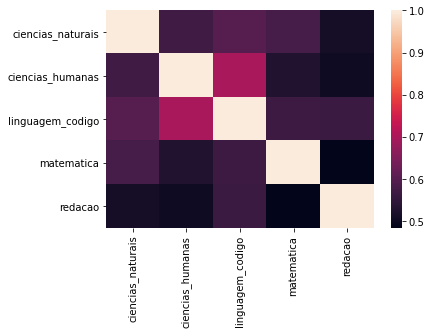

In [52]:
sns.heatmap(corr)

Primeiro gráfico

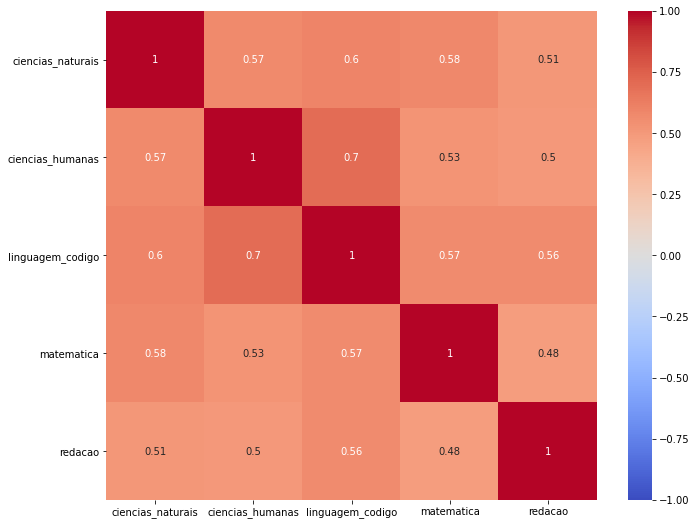

In [53]:
plt.figure(figsize=(11, 9))
#annot: Faz os valores aparecerem
#cmap: Mapa de cores
#vmin, vmax: Valor mínimo e máximo
#center: Valor mediano
sns.heatmap(corr, annot = True, cmap = "coolwarm", vmin=-1, vmax=1, center = 0)
plt.yticks(rotation = 0)  #Desfazendo rotação no texto no eixo Y

plt.show()

Invertendo texto no eixo Y

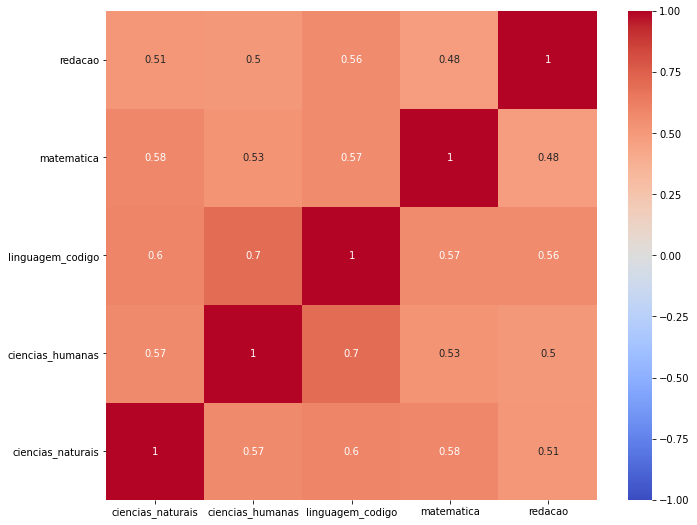

In [54]:
plt.figure(figsize=(11, 9))
obj_heatmap = sns.heatmap(corr, annot = True, cmap = "coolwarm", vmin=-1, vmax=1, center = 0)
plt.yticks(rotation = 0)  #Desfazendo rotação no texto no eixo Y
obj_heatmap.invert_yaxis() #Invertendo ordem do texto no eixo Y

plt.show()

Eliminado duplicidades e correlações iguais a 1

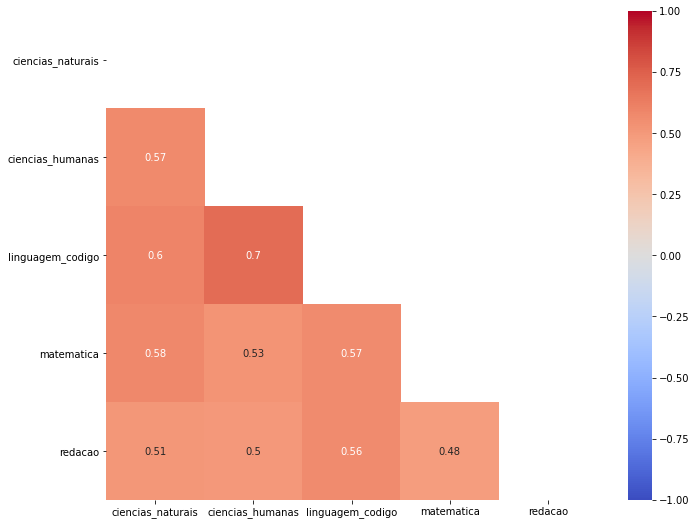

In [55]:
mask = np.zeros(corr.shape, dtype=bool)
mask[np.triu_indices(len(mask))] = True

plt.figure(figsize=(11, 9))
obj_heatmap = sns.heatmap(corr, annot = True, cmap = "coolwarm", vmin=-1, vmax=1, center = 0, mask= mask)
plt.yticks(rotation = 0)  #Desfazendo rotação no texto no eixo Y

plt.show()

Fonte: https://towardsdatascience.com/formatting-tips-for-correlation-heatmaps-in-seaborn-4478ef15d87f